In [2]:
from transformers import pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from datasets import load_dataset

In [3]:
model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", top_k=3)
result = model("I hate you")[0]
print(result)

[{'label': 'LABEL_0', 'score': 0.965427041053772}, {'label': 'LABEL_1', 'score': 0.028996311128139496}, {'label': 'LABEL_2', 'score': 0.005576656199991703}]


In [4]:
class SentimentAnalysis:
    def __init__(self):
        self.model = pipeline("sentiment-analysis", model="cardiffnlp/twitter-roberta-base-sentiment", top_k=3)
        self.labels = {"LABEL_0": "negative", "LABEL_1": "neutral", "LABEL_2": "positive"}

    def predict(self, text):
        result = self.model(text)[0]
        results = {self.labels[res["label"]]: res['score'] for res in result}
        return results

In [5]:
sentiment_analysis = SentimentAnalysis()
result = sentiment_analysis.predict("I hate you")
print(result)

{'negative': 0.965427041053772, 'neutral': 0.028996311128139496, 'positive': 0.005576656199991703}


In [6]:
dataset = load_dataset("glue", "sst2")

print(len(dataset["train"]))

print(dataset["train"][:5])

Found cached dataset glue (C:/Users/Tobias/.cache/huggingface/datasets/glue/sst2/1.0.0/dacbe3125aa31d7f70367a07a8a9e72a5a0bfeb5fc42e75c9db75b96da6053ad)


  0%|          | 0/3 [00:00<?, ?it/s]

67349
{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature ', 'remains utterly satisfied to remain the same throughout ', 'on the worst revenge-of-the-nerds clichés the filmmakers could dredge up '], 'label': [0, 0, 1, 0, 0], 'idx': [0, 1, 2, 3, 4]}


In [7]:
print(set(dataset["train"]["label"]))

{0, 1}


In [8]:
result = sentiment_analysis.predict(dataset["train"][0]["sentence"])
print(result)
print(dataset["train"][0]["label"])

{'neutral': 0.6850255727767944, 'negative': 0.28855863213539124, 'positive': 0.026415817439556122}
0


In [9]:
print(dataset["train"].features)
print(len(dataset["train"]))
print(set(dataset["train"]["label"]))

{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}
67349
{0, 1}


In [10]:
print(dataset["train"].features)

print(dataset["train"][:3])

{'sentence': Value(dtype='string', id=None), 'label': ClassLabel(num_classes=2, names=['negative', 'positive'], id=None), 'idx': Value(dtype='int32', id=None)}
{'sentence': ['hide new secretions from the parental units ', 'contains no wit , only labored gags ', 'that loves its characters and communicates something rather beautiful about human nature '], 'label': [0, 0, 1], 'idx': [0, 1, 2]}


In [15]:
y_true = []
y_pred = []
i = 0
for row in dataset["train"]:
    if i == 1000:
        break
    i += 1
    result = sentiment_analysis.predict(row["sentence"])
    if row["label"] == 0:
        y_true.append("negative")
    elif row["label"] == 1:
        y_true.append("positive")
    else:
        print("error")
        break
    y_pred.append(max(result, key=result.get))

print(y_true)
print(y_pred)

['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'po

In [16]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.554
              precision    recall  f1-score   support

    negative       0.93      0.63      0.75       458
     neutral       0.00      0.00      0.00         0
    positive       0.97      0.49      0.65       542

    accuracy                           0.55      1000
   macro avg       0.63      0.37      0.47      1000
weighted avg       0.95      0.55      0.70      1000



C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Tobias\anaconda3\envs\HateyBot\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


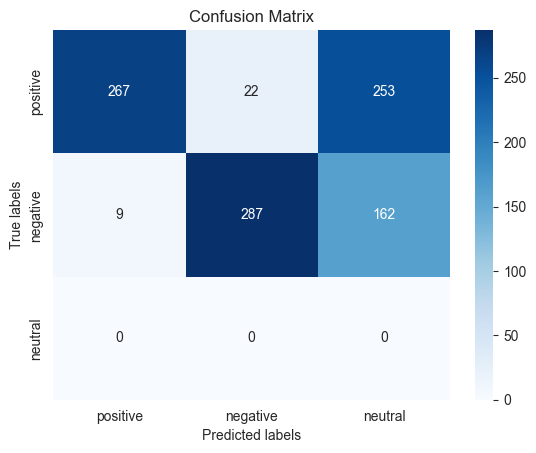

In [19]:
cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative", "neutral"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap="Blues")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["positive", "negative", "neutral"])
ax.yaxis.set_ticklabels(["positive", "negative", "neutral"])
plt.show()

# Ignoring neutral sentiment

In [20]:
y_true = []
y_pred = []
i = 0
for row in dataset["train"]:
    if i == 1000:
        break
    i += 1
    result = sentiment_analysis.predict(row["sentence"])
    if row["label"] == 0:
        y_true.append("negative")
    elif row["label"] == 1:
        y_true.append("positive")
    else:
        print("error")
        break
    if max(result, key=result.get) == "neutral":
        y_pred.append(sorted(result, key=result.get, reverse=True)[1])
    else:
        y_pred.append(max(result, key=result.get))

print(y_true)
print(y_pred)

['negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'positive', 'positive', 'positive', 'po

In [21]:
print(accuracy_score(y_true, y_pred))
print(classification_report(y_true, y_pred))

0.87
              precision    recall  f1-score   support

    negative       0.82      0.92      0.87       458
    positive       0.92      0.83      0.87       542

    accuracy                           0.87      1000
   macro avg       0.87      0.87      0.87      1000
weighted avg       0.88      0.87      0.87      1000



ValueError: The number of FixedLocator locations (3), usually from a call to set_ticks, does not match the number of ticklabels (2).

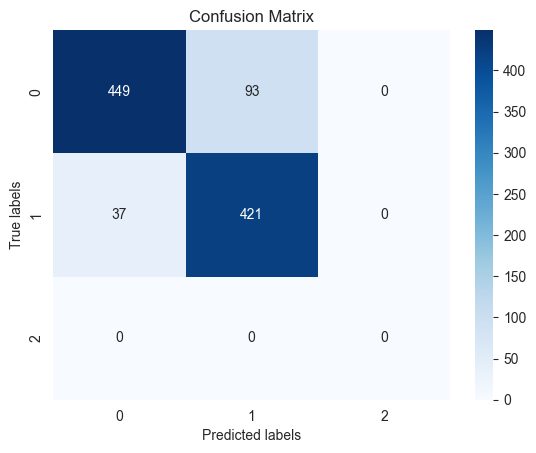

In [22]:
cm = confusion_matrix(y_true, y_pred, labels=["positive", "negative", "neutral"])

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, fmt="d", cmap="Blues")

ax.set_xlabel("Predicted labels")
ax.set_ylabel("True labels")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(["positive", "negative"])
ax.yaxis.set_ticklabels(["positive", "negative"])
plt.show()